In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Imported the train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/MIS 545/Project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MIS 545/Project/test.csv')

train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
test_df = test_df.loc[:, ~test_df.columns.str.contains('^Unnamed')]

In [ ]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Printed the rows and columns of train and test data
train_df.shape, test_df.shape

((103904, 24), (25976, 24))

In [ ]:
#Count the number of null values in train_df
train_df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
#Replacing the null values in the train and test sets with the median from the train set
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)

/tmp/ipython-input-515587572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
/tmp/ipython-input-515587572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [ ]:
#Checking for nulls in the train set
train_df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
# Encoding the categorical variables

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

nominal_cols = ['Gender', 'Type of Travel']
ordinal_cols = ['Customer Type', 'Class']

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
oe = OrdinalEncoder(categories=[['disloyal Customer', 'Loyal Customer'],['Eco', 'Eco Plus', 'Business']])
le = LabelEncoder()

train_nominal = pd.DataFrame(ohe.fit_transform(train_df[nominal_cols]),
                             columns=ohe.get_feature_names_out(nominal_cols),
                             index=train_df.index)

train_ordinal = pd.DataFrame(oe.fit_transform(train_df[ordinal_cols]),
                             columns=ordinal_cols,
                             index=train_df.index)

train_df['satisfaction'] = le.fit_transform(train_df['satisfaction'])

test_nominal = pd.DataFrame(ohe.transform(test_df[nominal_cols]),
                            columns=ohe.get_feature_names_out(nominal_cols),
                            index=test_df.index)

test_ordinal = pd.DataFrame(oe.transform(test_df[ordinal_cols]),
                            columns=ordinal_cols,
                            index=test_df.index)

test_df['satisfaction'] = le.transform(test_df['satisfaction'])

train_final = pd.concat([train_df.drop(columns=nominal_cols + ordinal_cols),
                         train_nominal, train_ordinal], axis=1)

test_final = pd.concat([test_df.drop(columns=nominal_cols + ordinal_cols),
                        test_nominal, test_ordinal], axis=1)

In [ ]:
X_train = train_final.drop(columns=['satisfaction', 'id'])
y_train = train_final['satisfaction']

X_test = test_final.drop(columns=['satisfaction', 'id'])
y_test = test_final['satisfaction']

In [ ]:
#Check for missing values in X_train
X_train.isnull().sum()

,0
Age,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0
Food and drink,0
Online boarding,0
Seat comfort,0
Inflight entertainment,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Base Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8713427779488759
Precision: 0.8680485800383526
Recall: 0.8336402701043585


In [ ]:
#Running LASSO Regression
from sklearn.linear_model import LogisticRegressionCV

lasso = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)
lasso.fit(X_train_scaled, y_train)

print("Best C (inverse of regularization strength):", lasso.C_)
print("Test Accuracy:", lasso.score(X_test_scaled, y_test))
#Print Precision
print("Precision:", precision_score(y_test, lasso.predict(X_test_scaled)))
#Print Recall
print("Recall:", recall_score(y_test, lasso.predict(X_test_scaled)))

Best C (inverse of regularization strength): [0.04641589]
Test Accuracy: 0.8711887896519864
Precision: 0.8677987765908883
Recall: 0.8335525738840656


In [ ]:
#Features that have been retained
selected_features = X_train.columns[(lasso.coef_ != 0).ravel()]
print("Selected features after LASSO:\n", selected_features)

Selected features after LASSO:
 Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Type of Travel_Personal Travel', 'Customer Type',
       'Class'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(
    estimator=LogisticRegression(max_iter=1000),
    step=1,
    cv=5,
    scoring='accuracy'
)
rfecv.fit(X_train_scaled, y_train)

print("Optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

Optimal number of features: 15
Best features: Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Online boarding', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Type of Travel_Personal Travel',
       'Customer Type', 'Class'],
      dtype='object')


In [ ]:
#Print Accuracy for RFECV
print("Accuracy:", rfecv.score(X_test_scaled, y_test))
#Print Precision
print("Precision:", precision_score(y_test, rfecv.predict(X_test_scaled)))
#Print Recall
print("Recall:", recall_score(y_test, rfecv.predict(X_test_scaled)))

Accuracy: 0.8704188481675392
Precision: 0.8664174341205434
Recall: 0.8332894852231869


Base Logistic Regression:
*   Accuracy: 0.8713427779488759
*   Precision: 0.8680485800383526
*   Recall: 0.8336402701043585

LASSO:
*   Accuracy: 0.8711887896519864
*   Precision: 0.8678659483152223
*   Recall: 0.8334648776637726

RFECV:
*   Accuracy: 0.8704188481675392
*   Precision: 0.8664174341205434
*   Recall: 0.8332894852231869

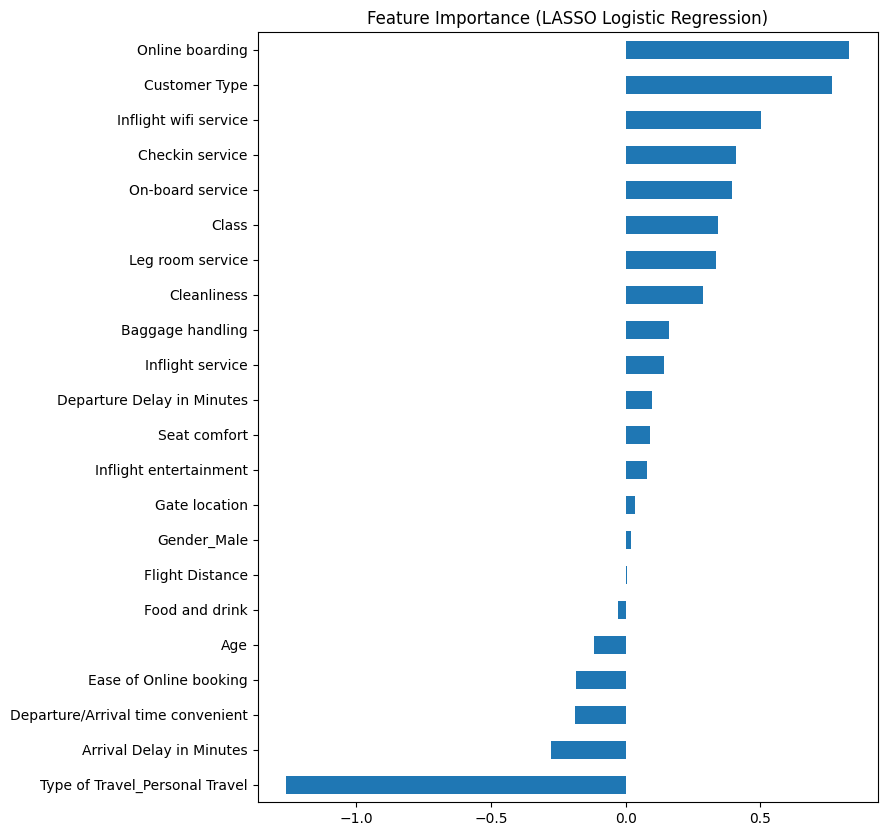

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

coef = pd.Series(lasso.coef_.ravel(), index=X_train.columns)
coef.sort_values().plot(kind='barh', figsize=(8, 10))
plt.title('Feature Importance (LASSO Logistic Regression)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import time

#Declaring our models and hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [4, 6], 'learning_rate': [0.1, 0.3]}
}

results = []

#Model training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")
    start = time.time()

    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    #Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': auc,
        'Training Time (s)': round(time.time() - start, 2),
        'Best Params': grid.best_params_
    })

#Comparison table
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
display(results_df)

#Best model by accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"\nBest Model by Accuracy: {best_model_name}")

#Best model by AUC
best_model_auc = results_df.loc[results_df['ROC-AUC'].idxmax(), 'Model']
print(f"Best Model by ROC-AUC: {best_model_auc}")

#Print best params
print("\nBest Parameters for Each Model:")
for _, row in results_df.iterrows():
    print(f"  {row['Model']}: {row['Best Params']}")


Training Logistic Regression...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Training Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:04:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Training Time (s),Best Params
0,Logistic Regression,0.871535,0.868042,0.834166,0.850767,0.925630,23.95,{'C': 1}
1,Random Forest,0.963197,0.972416,0.942910,0.957435,0.993972,280.82,"{'max_depth': 20, 'min_samples_split': 2, 'n_e..."
2,XGBoost,0.964275,0.973682,0.944138,0.958682,0.995279,32.19,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti..."



Best Model by Accuracy: XGBoost
Best Model by ROC-AUC: XGBoost

Best Parameters for Each Model:
  Logistic Regression: {'C': 1}
  Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
  XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Identify best model based on accuracy
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f" Best Model Selected for SHAP: {best_model_name}")

# Refit the best model on the full training data using its best params
best_params = results_df.loc[results_df['Accuracy'].idxmax(), 'Best Params']
model_class = models[best_model_name].__class__
best_model = model_class(**best_params, random_state=42)

# Use scaled data for training the best model as the models were evaluated on scaled data
best_model.fit(X_train_scaled, y_train)
print(" Best model retrained on full training data.")

 Best Model Selected for SHAP: XGBoost
 Best model retrained on full training data.


  0%|          | 0/100 [00:00<?, ?it/s]

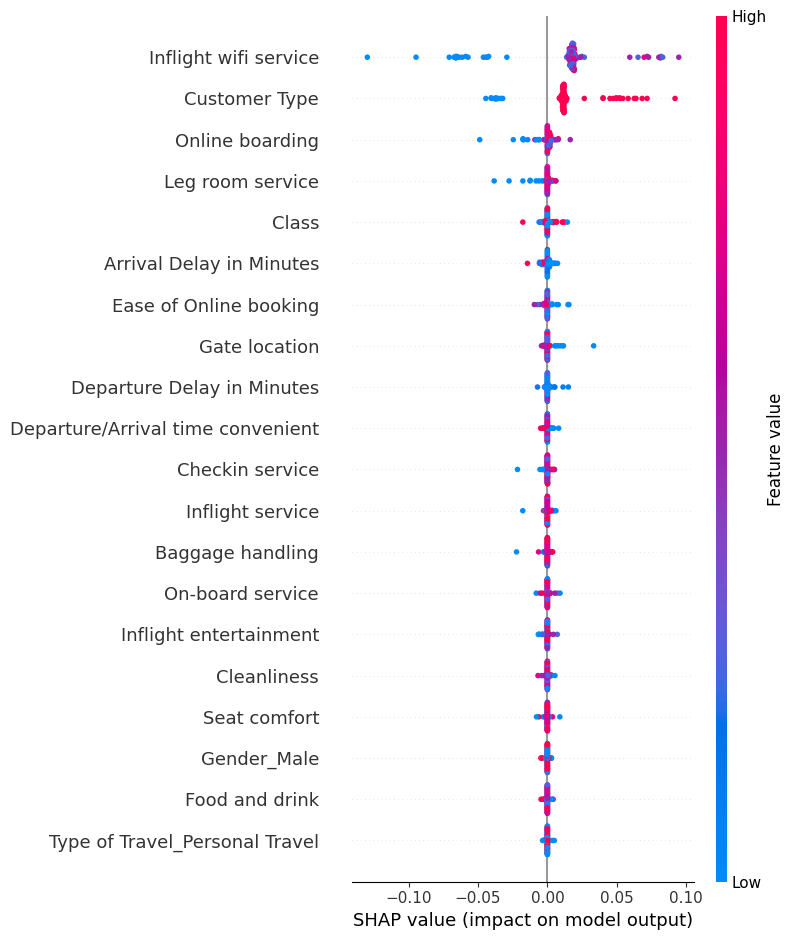

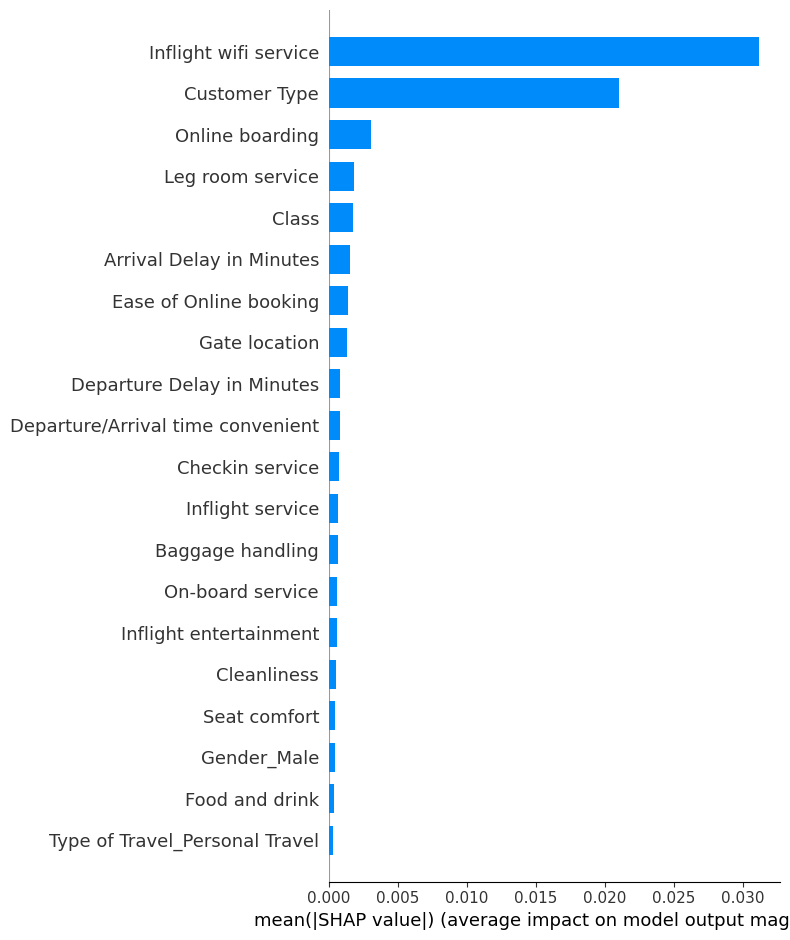

In [ ]:
import shap

# Sample small subset for speed
X_test_sample = X_test.sample(100, random_state=42)
X_train_sample = X_train.sample(100, random_state=42)  # background for KernelExplainer

# Define prediction function
f = lambda x: best_model.predict_proba(x)[:, 1]

# Create KernelExplainer (model-agnostic)
explainer = shap.KernelExplainer(f, X_train_sample)

# Compute SHAP values (this may take a few minutes)
shap_values = explainer.shap_values(X_test_sample, nsamples=100)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_sample)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


In [ ]:
import pandas as pd
import numpy as np

# If KernelExplainer returns array
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'Mean_ABS_SHAP': mean_abs_shap
}).sort_values(by='Mean_ABS_SHAP', ascending=False)

# Top 10 features
top_features = feature_importance.head(10)
print(top_features)


                              Feature  Mean_ABS_SHAP
2               Inflight wifi service       0.031126
20                      Customer Type       0.021008
7                     Online boarding       0.003080
11                   Leg room service       0.001839
21                              Class       0.001769
17           Arrival Delay in Minutes       0.001523
4              Ease of Online booking       0.001358
5                       Gate location       0.001295
16         Departure Delay in Minutes       0.000839
3   Departure/Arrival time convenient       0.000786



### Detailed Explanation of Each Step:

1.  **Data Loading & Initial Inspection**:
    *   **Action**: The process begins by mounting Google Drive to access the datasets. Then, `train.csv` and `test.csv` are loaded into pandas DataFrames. Any 'Unnamed' columns are removed, and the first few rows of the training data (`train_df.head()`) are displayed along with the dimensions (rows, columns) of both datasets (`train_df.shape, test_df.shape`) to get a quick overview.
    *   **Purpose**: To import the necessary data and understand its basic structure and size.

2.  **Handle Missing Values**:
    *   **Action**: The code checks for null values in `train_df`. Specifically, it identifies missing values in the 'Arrival Delay in Minutes' column. These missing values are then imputed (filled) with the median value of 'Arrival Delay in Minutes' from the training set, applying this to both the training and test datasets. Finally, it re-verifies that there are no remaining nulls in `train_df`.
    *   **Purpose**: To ensure data completeness and prevent errors or biases in subsequent modeling steps due to missing information.

3.  **Feature Engineering: Encoding Categorical Variables**:
    *   **Action**: Categorical features are transformed into numerical representations. `OneHotEncoder` is applied to nominal variables ('Gender', 'Type of Travel'), `OrdinalEncoder` to ordinal variables ('Customer Type', 'Class'), and `LabelEncoder` to the target variable 'satisfaction'. The original categorical columns are dropped, and the newly encoded numerical columns are concatenated to form `train_final` and `test_final` DataFrames.
    *   **Purpose**: Machine learning algorithms typically require numerical input, so this step converts non-numerical features into a suitable format.

4.  **Data Splitting: X and y**:
    *   **Action**: The processed datasets (`train_final` and `test_final`) are split into features (`X_train`, `X_test`) and the target variable (`y_train`, `y_test`). The 'satisfaction' column is the target, and the 'id' column is dropped as it's an identifier, not a feature.
    *   **Purpose**: To prepare the data for supervised learning, separating the independent variables (features) from the dependent variable (target).

5.  **Feature Scaling: StandardScaler**:
    *   **Action**: `StandardScaler` is applied to the feature sets (`X_train` and `X_test`). This scales the features such that they have a mean of 0 and a standard deviation of 1.
    *   **Purpose**: Scaling is crucial for many machine learning algorithms (especially distance-based ones like Logistic Regression) to ensure that no single feature dominates the learning process due to its larger numerical range.

6.  **Model Training & Evaluation: Baseline, LASSO, RFECV**:
    *   **Action**: Three different logistic regression-based models are trained and evaluated:
        *   **Base Logistic Regression**: A standard Logistic Regression model, with L2 regularization, is trained and its accuracy, precision, and recall are reported.
        *   **LASSO Regression**: Logistic Regression with L1 regularization (LASSO) is applied using `LogisticRegressionCV` to perform cross-validation and select the optimal regularization strength. The best C value (inverse of regularization strength), accuracy, precision, and recall are printed, along with the features retained by LASSO.
        *   **RFECV**: Recursive Feature Elimination with Cross-Validation (`RFECV`) is used with a Logistic Regression estimator to identify the optimal number of features and the best subset of features. The accuracy, precision, and recall of the model with these selected features are reported.
    *   **Purpose**: To establish baseline model performance, explore regularization for feature selection (LASSO), and perform automated feature selection (RFECV) to potentially improve model efficiency and performance.

7.  **Visualize LASSO Feature Importance**:
    *   **Action**: The coefficients of the LASSO regression model are extracted, paired with their corresponding feature names, and then sorted. A horizontal bar plot is generated to visually represent the importance (magnitude of coefficients) of each feature as determined by LASSO.
    *   **Purpose**: To provide a clear visualization of which features were deemed most influential by the LASSO model in predicting satisfaction.

8.  **Model Comparison & Hyperparameter Tuning (GridSearchCV)**:
    *   **Action**: Logistic Regression, Random Forest, and XGBoost models are set up. For each model, `GridSearchCV` is used to systematically search for the best combination of hyperparameters that maximize accuracy through cross-validation. Metrics including Accuracy, Precision, Recall, F1 Score, and training time are recorded. The results are saved to a CSV and displayed in a DataFrame, highlighting the best model based on accuracy and its optimal hyperparameters.
    *   **Purpose**: To find the best-performing model among several candidates and optimize their performance by tuning their hyperparameters, leading to a more robust and accurate predictive model.

9.  **Retrain Best Model & SHAP Feature Importance**:
    *   **Action**: The best model identified from the hyperparameter tuning phase is retrained on the full scaled training data using its optimal parameters. Then, SHAP (SHapley Additive exPlanations) is used to interpret this best model. A small sample of `X_test` and `X_train` is used for efficiency. A `shap.KernelExplainer` is initialized, and SHAP values are computed. Finally, SHAP summary plots (dot plot and bar plot) are generated to visualize feature importance, and the top 10 features based on their mean absolute SHAP values are printed.
    *   **Purpose**: To provide deep insights into how the best model makes its predictions, explaining the contribution of each feature to the model's output in a human-understandable way.